In [3]:
import myTA
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

c:\Users\QbaSo\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


macdMomentumLoss score: $-267.40467071533203
bestPossible score: $1123.7949447631836
simpleMACD score: $-49.23109436035156
simpleMACDZeroHistPrediction score: $-85.10334777832031
buyAndHold score: $-84.78700256347656


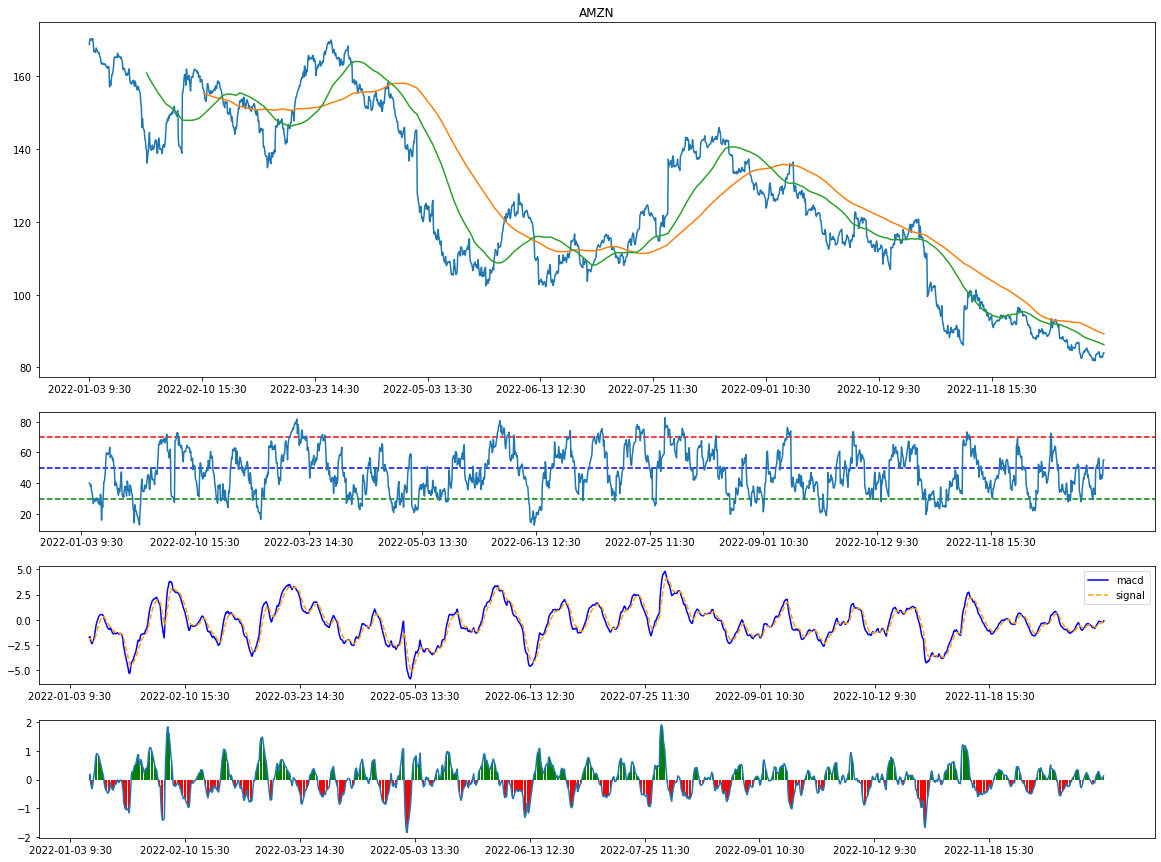

In [4]:
# code = "BTC-USD"
code = "AMZN"
data = myTA.downloadAndMakeAnalysis(code, dt.datetime(2022,1,1), dt.datetime.now(),'1h')

myTA.plotAnalysis(data, code, [])

tradesList = myTA.TradingStrategies.macdMomentumLoss(data)
print( f"macdMomentumLoss score: ${myTA.calculateProfit(tradesList, 0)}")

tradesList = myTA.TradingStrategies.bestPossible(data)
print( f"bestPossible score: ${myTA.calculateProfit(tradesList, 0)}")

tradesList = myTA.TradingStrategies.simpleMACD(data)
print( f"simpleMACD score: ${myTA.calculateProfit(tradesList, 0)}")

tradesList = myTA.TradingStrategies.simpleMACDZeroHistPrediction(data)
print( f"simpleMACDZeroHistPrediction score: ${myTA.calculateProfit(tradesList, 0)}")

tradesList = myTA.TradingStrategies.buyAndHold(data)
print( f"buyAndHold score: ${myTA.calculateProfit(tradesList, 0)}")

In [5]:
tickers = pd.read_csv("tickers.csv")
tickers

,ACT Symbol,Company Name
0,A,"Agilent Technologies, Inc. Common Stock"
1,AA,Alcoa Inc. Common Stock
2,AAC,"AAC Holdings, Inc. Common Stock"
3,AAN,"Aaron's, Inc. Common Stock"
4,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I
...,...,...
2850,ZPIN,"Zhaopin Limited American Depositary Shares, ea..."
2851,ZQK,"Quiksilver, Inc. Common Stock"
2852,ZTR,"Zweig Total Return Fund, Inc. (The) Common Stock"
2853,ZTS,Zoetis Inc. Class A Common Stock


In [6]:
data = myTA.downloadAndMakeAnalysis(tickers['ACT Symbol'][100], dt.datetime(2021,1,1), dt.datetime.now(),'1d')
data

,Open,High,Low,Close,Adj Close,Volume,RSI,macd,macd_signal,macd_hist,SMA200,SMA100
Date,,,,,,,,,,,,
2020-12-31,148.759995,149.369995,146.809998,147.520004,145.380798,779200,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,152.899994,156.759995,150.289993,152.630005,150.416672,2898700,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,152.669998,166.779999,152.669998,162.929993,160.567307,2628000,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,165.500000,178.589996,165.500000,175.100006,172.560852,3335500,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,183.479996,187.250000,180.550003,184.000000,181.331757,2947800,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,224.479996,227.160004,221.240005,226.960007,226.960007,678700,30.456768,-13.169099,-10.381266,-2.787833,245.45180,272.300300
2022-12-27,225.289993,226.169998,213.520004,214.160004,214.160004,1871700,25.882890,-14.373160,-11.179644,-3.193515,245.59880,272.093000
2022-12-28,213.440002,217.020004,210.419998,214.039993,214.039993,1754800,25.843703,-15.162289,-11.976173,-3.186116,245.78755,271.853499


# how to work in real time

In [7]:
import talib as ta

for i in range(34,40):
    macd = ta.MACD(data['Close'][i-34:i])
    data.loc[data.index[i],'macd'], data.loc[data.index[i],'macd_signal'], data.loc[data.index[i],'macd_hist'] = macd[0][-1], macd[1][-1], macd[2][-1]

# TODO
* fit curve to macdhist to determine trade time
* cure params are fitted based on historical data of the stock and best/leeast risky performacne

after that:
* run for many tickers
* measure performance
* experiment with different timeframes

ADD SHORTING